<a href="https://colab.research.google.com/github/rida-manzoor/DL/blob/main/Customer_Churn_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Artificial Neural Network (ANN)

An Artificial Neural Network (ANN) is a computational architecture inspired by the neural structure of the human brain. It comprises interconnected nodes called neurons, organized in layers. These neurons pass information through the network, and during training, the network adapts the connection strengths (weights) to learn from data. This process allows the ANN to identify patterns, make predictions, and perform tasks in machine learning and artificial intelligence.

- There are three layers in the network architecture: the input layer, the hidden layer (more than one), and the output layer. Because of the numerous layers are sometimes referred to as the MLP (Multi-Layer Perceptron).

![alt](https://cdn.analyticsvidhya.com/wp-content/uploads/2024/01/image-102.png)

- 
The hidden layer within an Artificial Neural Network (ANN) can be conceptualized as a "distillation layer" responsible for extracting crucial patterns from the input data. This layer acts like a filter, identifying and retaining the most relevant information while discarding redundant data. By focusing on the extraction of essential features, the hidden layer enhances the network's efficiency by reducing the dimensionality of the data and providing a more streamlined representation for further analysis in subsequent layers. This "distillation" process underscores the importance of feature extraction in neural networks, particularly in deep learning models where hierarchical representations are learned progressively across multiple layer
- Discovering the most effective values for the weights (W) that minimize prediction errors is crucial for constructing a successful model. The backpropagation algorithm achieves this by transforming an Artificial Neural Network (ANN) into a learning algorithm that learns from its errors.
- The optimization process employs a gradient descent technique to quantify prediction errors accurately. It involves testing small adjustments in the weights (W) and analyzing their impact on prediction errors. The optimal values for W are then determined based on the observation that further changes in W no longer decrease the number of mistakes significantly.s.

##  **Advantages:**
*

1. **Non-Linearity:** ANNs can model complex non-linear relationships in data, making them suitable for tasks where traditional linear models may struggle.

2. **Feature Learning:** ANNs can automatically learn relevant features from raw data, reducing the need for manual feature engineering.

3. **Parallel Processing:** ANNs can process multiple inputs simultaneously, leading to faster computations, especially on parallel computing platforms.

4. **Adaptability:** ANNs can adapt to changing input patterns and adjust their internal parameters (weights) during training, making them versatile for various tasks.

5. **Generalization:** Well-trained ANNs can generalize patterns from training data to make accurate predictions on unseen or new data, indicating good generalizatio##  n ability.

**Disadvantages:**

1. **Complexity:** Designing and training ANNs can be complex, requiring expertise in model architecture, hyperparameter tuning, and handling issues like overfitting.

2. **Data Requirements:** ANNs may require large amounts of data for training, and they can be sensitive to data quality, noise, and outliers.

3. **Computational Resources:** Training deep ANNs with many layers and parameters can be computationally intensive and may require high-performance hardware or cloud resources.

4. **Black Box Nature:** ANNs are often seen as "black box" models, making it challenging to interpret their internal workings and decisions, especially in complex architectures.

5. **Overfitting:** ANNs can be prone to overfitting, where the model learns to memorize training data rather than generalize, leading to poor pnt machine learning tasks.

Here, we are taking Customer Churn Dataset from Kaggle to see how we can make simple ANN, and how things work.

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("Churn_Modelling.csv")
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [3]:
df.shape

(10000, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [6]:
df["Geography"].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [7]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [8]:
df.drop(columns=['RowNumber','CustomerId','Surname'], inplace=True)

In [9]:
df = pd.get_dummies(df,columns=['Geography','Gender'], drop_first=True)

In [10]:
x = df.drop(columns=['Exited'])
y = df['Exited']

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1)

In [13]:
x_train

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
2694,628,29,3,113146.98,2,0,1,124749.08,True,False,True
5140,626,29,4,105767.28,2,0,0,41104.82,False,False,False
2568,612,47,6,130024.87,1,1,1,45750.21,True,False,False
3671,646,52,6,111739.40,2,0,1,68367.18,True,False,False
7427,714,33,8,122017.19,1,0,0,162515.17,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...
2895,621,47,7,107363.29,1,1,1,66799.28,True,False,True
7813,684,63,3,81245.79,1,1,0,69643.31,True,False,False
905,672,45,9,0.00,1,1,1,92027.69,False,False,False
5192,663,39,8,0.00,2,1,1,101168.90,False,False,False


In [14]:
y_train

2694    0
5140    0
2568    1
3671    0
7427    0
       ..
2895    0
7813    1
905     1
5192    0
235     1
Name: Exited, Length: 8000, dtype: int64

In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
scalar = StandardScaler()

x_train_scaled = scalar.fit_transform(x_train)
x_test_scaled = scalar.fit_transform(x_test)

**Tensorflow**  is a free and open-source software library for machine learning and artificial intelligence. It can be used across a range of tasks but has a particular focus on training and inference of deep neural networks.

**Keras** is a high-level, deep learning API developed by Google for implementing neural networks. It is written in Python and is used to make the implementation of neural networks easy. It also supports multiple backend neural network computation.

A Sequential model is appropriate for a plain stack of layers where each layer has exactly one input tensor and one output tensor.

A Sequential model is not appropriate when:

1. Your model has multiple inputs or multiple outputs
2. Any of your layers has multiple inputs or multiple outputs
3. You need to do layer sharing
4. You want non-linear topology (e.g. a residual connection, a multi-branch model)


The **Functional API** allows for more complex model architectures, including multiple input and output tensors, shared layers, and non-linear connections. It is more flexible than the Sequential model.

Keras had a variety of layers available in the `keras.layers` module. Some commonly used layers include:

1. **Core Layers:**
   - `Input Object`
   - `Dense`: A dense layer, also known as a fully connected layer, is a fundamental building block in neural network architectures. In a dense layer, every neuron is connected to every neuron in the previous and subsequent layers. This means that each neuron in a dense layer receives input from all neurons in the previous layer and passes its output to all neurons in the next layer.
   - `Activation`: Applies an activation function. 
Activation functions are mathematical functions applied to the output of neurons in artificial neural networks (ANNs). These functions introduce non-linearity into the network, allowing it to learn complex patterns and relationships in the data.
   - `Dropout`: Applies dropout to prevent overfitting.
   - `Flatten`: Flattens the input.

2. **Convolutional Layers:**
   - `Conv1D`, `Conv2D`, `Conv3D`: Convolutional layers for 1D, 2D, and 3D inputs A convolutional layer is a fundamental building block in convolutional neural networks (CNNs) used primarily for image-related tasks such as image classification, object detection, and image segmentation. It performs convolution operations on input data using learnable filters (also known as kernels) to extract meaningful features from the input..
   - `SeparableConv2D`:The SeparableConv2D layer is a variant of the traditional convolutional layer used in convolutional neural networks (CNNs). It is designed to reduce the number of parameters and computational complexity while retaining the ability to capture meaningful features from input data, especially in scenarios with limited computational resources or when building lightweight models..
   - `Conv2DTranspose`:The Conv2DTranspose layer, also known as the transposed convolution or deconvolution layer, is a crucial component in convolutional neural networks (CNNs), especially in tasks like image segmentation, image generation, and image-to-image translation. Unlike the traditional Conv2D layer, which performs down-sampling through convolution, the Conv2DTranspose layer performs up-sampling through transposed convolution operations..
43. **Pooling Layers:**
   - `MaxPooling1D`, `MaxPooling2D`, `MaxPooling3D`: Max pooling layers for 1D, 2D, and 3D inputs.
54. **Recurrent Layers:**
    Recurrent layers are a type of layer used in recurrent neural networks (RNNs) and their variants, such as Long Short-Term Memory (LSTM) and Gated Recurrent Unit (GRU) networks. These layers are designed to process sequential data with temporal dependencies, making them suitable for tasks such as time series analysis, natural language processing, speech recognition, and sequence generation.
   -  `LSTM`, `GRU`: Long Short-Term Memory and Gated Recurrent Unit layers.
65. **Embedding Layer:**
    The Embedding layer is a fundamental component in natural language processing (NLP) tasks within deep learning models. It is specifically designed to learn and map high-dimensional discrete data, such as words or categorical variables, into lower-dimensional continuous vector representations (embeddings). The Embedding layer is commonly used in word embedding models, where words from a vocabulary are mapped to dense vector representations in a continuous vector space.
   -  `Embedding`: Turns positive integers into dense vectors of fixed size.
76. **Normalization Layers:**
    Normalization layers are a type of layer used in deep learning models to improve training stability, convergence speed, and generalization ability. These layers are designed to normalize the activations or outputs of neurons within a neural network, helping to alleviate issues such as vanishing or exploding gradients, covariate shift, and internal covariate shift. There are several types of normalization layers commonly used in deep learning architectures:
   -  `BatchNormalization`: Applies batch normalization.
87. **Noise Layers:**
    Noise layers are a type of layer used in deep learning models to introduce random noise or perturbations to the input data or activations within the network. These layers play a role in regularization, data augmentation, and improving the robustness of the model to noisy or incomplete input data. 
   -  `GaussianNoise`, `GaussianDropout`: Introduces Gaussian noise.
98. **Advanced Activation Layers:**
   - `LeakyReLU`, `PReLU`, `ELU`: Advanced activation functions.
109. **Merge Layers:**
   - `Add`, `Subtract`, `Multiply`, `Average`, etc.: Merge layers for combining multiple inputs.
110. **Image Preprocessing Layers:**
    - `Rescaling`, `CenterCrop`, `RandomFlip`, etc.: Layers for image preprocessing.
121. **Normalization Layers:**
    - `LayerNormalization`: Applies layer normalization.
132. **Attention Layers:**
     Attention layers are a key component in deep learning architectures, especially in natural language processing (NLP) tasks and sequence-to-sequence models. They enable the model to focus on relevant parts of the input sequence when making predictions or generating outputs, improving performance on tasks such as machine translation, text summarization, and sentiment analysis.
    - 
    -  `Attention`: Implements attention mechanisms.

This is not an exhaustive list. For more detailed information: [Keras Documentation](https://keras.io/api/layers/).

In [17]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [18]:
model = Sequential()

In [19]:
# Input layer with 3 input neurons and input is 11 dimensional because we have 11 columns in datasets
model.add(Dense(3, activation='sigmoid',input_dim=11))

# Output layer with only one neuron. We do not have any hidden layer in this particular example for simplicity.
model.add(Dense(1,activation='sigmoid'))

C:\Users\Admin\anaconda3\envs\DL0\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [20]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 3)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │             4 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 40 (160.00 B)

 Trainable params: 40 (160.00 B)

 Non-trainable params: 0 (0.00 B)

In Keras, the **compile method** is used to configure the learning process for a model. It takes three important arguments:

1. **Optimizer:**

  This is the optimization algorithm used to update the weights during training. Examples include 'adam', 'sgd', or custom optimizers.

2. **Loss Function:**

  The loss function is a measure of the model's performance. It quantifies how well the model is doing, and the goal during training is to minimize this value. Examples include 'mean_squared_error', 'categorical_crossentropy', or custom loss functions.

3. **Metrics:**

  Metrics are used to monitor the training and testing steps. They can be specified as a list of strings (e.g., ['accuracy']) or custom metrics functions. Common metrics include 'accuracy' for classification problems and 'mae' (mean absolute error) for regression problems.

In [21]:
model.compile(loss='binary_crossentropy',optimizer='Adam')

In [22]:
history = model.fit(x_train_scaled,y_train,epochs=10)

Epoch 1/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 1.0565
Epoch 2/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.7744
Epoch 3/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6310
Epoch 4/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5486
Epoch 5/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5042
Epoch 6/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4846
Epoch 7/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4740
Epoch 8/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4590
Epoch 9/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4477
Epoch 10/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4484


In [23]:
# Get the weights of the first layer we have 33 parameters and 3 bais

model.layers[0].get_weights()

[array([[-0.3363227 , -0.17419972, -0.07053757],
        [ 1.0805528 ,  1.0347856 , -1.6063197 ],
        [-0.20346266,  0.28357154,  0.14547458],
        [ 0.31265295,  0.4373113 , -0.5992359 ],
        [ 0.05451648,  0.02204309, -0.07291351],
        [-0.03404184, -0.11169737, -0.01311933],
        [-0.83291787, -0.5530447 ,  0.81682473],
        [ 0.10257205,  0.02100535, -0.04561122],
        [ 0.24198917,  0.24484473, -0.6339859 ],
        [-0.00610308, -0.30253762, -0.04340905],
        [-0.53841543, -0.2702583 ,  0.596659  ]], dtype=float32),
 array([-0.66379994, -0.599721  ,  0.9732238 ], dtype=float32)]

In [24]:
# Get the weights of the second layer

model.layers[1].get_weights()

[array([[ 0.44223616],
        [ 0.3642631 ],
        [-1.1419148 ]], dtype=float32),
 array([-0.9715185], dtype=float32)]

In [25]:
# Predicting the target variable y_log using the trained model on the scaled test data x_test_scaled.
y_log = model.predict(x_test_scaled)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [26]:
# Applying a threshold of 0.5 to the predicted logarithmic values y_log to convert them into binary predictions.
y_pred = np.where(y_log>0.5,1,0)

In [27]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7925

### **How can we increase accuracy of neural networks?**

1. Increase number of epochs
2. Generally ReLu give better results when used in hidden layer
3. Increase number of node in hidden layers
4. Increase number of hidden layers

In [28]:
import matplotlib.pyplot as plt

In [29]:
history.history

{'loss': [0.9670592546463013,
  0.7335976362228394,
  0.6068138480186462,
  0.5364558100700378,
  0.4985230267047882,
  0.47792568802833557,
  0.46574345231056213,
  0.4573834240436554,
  0.45075586438179016,
  0.44522401690483093]}

KeyError: 'val_loss'

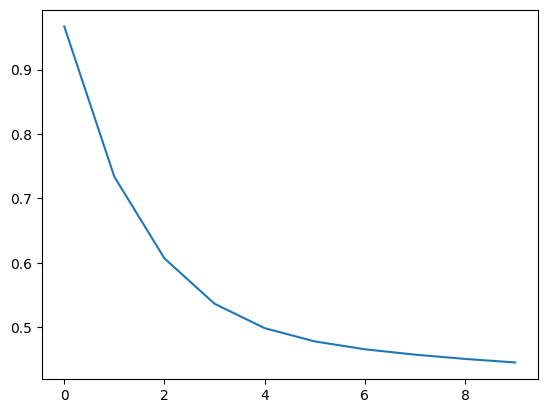

In [30]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])